In [ ]:
# подключаем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# загружаем и просматриваем данные
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [ ]:
# создаем новую переменную, которая содержит только Economy и Comfort 
df_new = df[df['offer_class_group'].isin(['Economy', 'Comfort'])]
df_new.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
6,2710,4,23.825352,2.142234,Comfort,1
11,3845,3,21.305555,83.829973,Economy,0
13,4957,3,26.919090,14.238745,Economy,1
14,5150,5,21.139232,4.334163,Economy,0
15,6635,7,35.440650,10.889072,Comfort,1


In [ ]:
# просматриваем описательную статистику по датасету
df_new.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,464368.957000,4.001000,22.554505,28.021013,0.454000
std,273102.356771,1.980637,4.485097,17.411605,0.498129
min,2710.000000,1.000000,14.899553,0.024259,0.000000
25%,231673.750000,2.000000,19.279054,14.589901,0.000000
50%,464699.000000,4.000000,21.435080,25.999262,0.000000
75%,713551.250000,6.000000,24.836157,39.221944,1.000000
max,919196.000000,7.000000,50.206056,90.516618,1.000000


In [ ]:
# визуализируем плотность распределения дистанций поездок для классов economу и comfort 

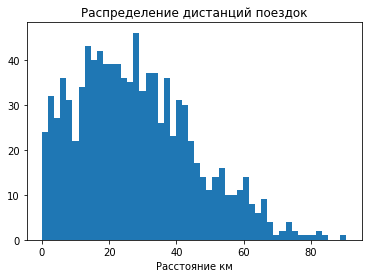

In [ ]:
# Строим гистограмму распределения плотности данных
plt.hist(df_new['distance_km'],50)
plt.title('Распределение дистанций поездок')
plt.xlabel('Расстояние км')
plt.show()

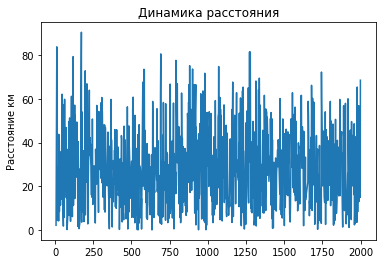

In [ ]:
#строим график динамики значений
plt.plot(df_new['distance_km'])
plt.title('Динамика расстояния')
plt.ylabel('Расстояние км')
plt.show()

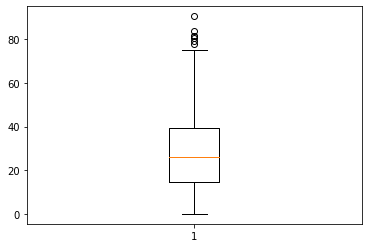

In [ ]:
#построим визуализацию boxplot
plt.boxplot(df_new['distance_km'])
plt.show()

In [ ]:
# есть определенные значения, которые выбиваются 

In [ ]:
# Формирование выборок (нет разницы, какую переменную брать - df или df_new)
df_1 = df[df['offer_class_group'] == 'Economy']
df_2 = df[df['offer_class_group'] == 'Comfort']

print('Выборки имеют одинаковую длинну: ', len(df_1) == len(df_2))

Выборки имеют одинаковую длинну:  True


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


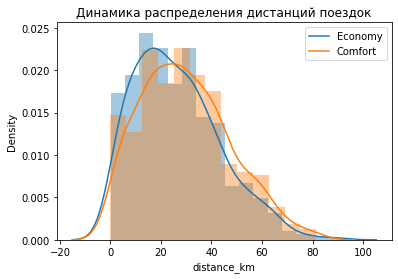

In [ ]:
# визуализируем доверительные интервалы
sns.distplot(df_1['distance_km'])
sns.distplot(df_2['distance_km'])
plt.title('Динамика распределения дистанций поездок')
plt.legend(['Economy', 'Comfort'])
plt.show()

In [ ]:
# Подключаем библиотеки статистических критериев и задания уровня значимости
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05                          # Уровень значимости

In [ ]:
# Проверяем гипотезу: “На дальние поездки, пользователи предпочитают эконом-классу стандартный”

In [ ]:
# Проводим Т-Тест (t-критерий Стьюдента)
result = ttest_ind(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


In [ ]:
# Вывод: На дальние поездки, пользователи НЕ предпочитают эконом-классу стандартный